In [11]:
%run helper.ipynb

In [12]:
file_path="/Users/lohith/Desktop/NEU_Courses/ThirdSemester/CS6510-ASD/data/TheGovernmentFinanceDatabase_CountyData/CountyData.csv"
ignore=set(['YearofData','IDChanged','FIPS_Place','YearPop','SchLevCode','FunctionCode'])

In [13]:
county = pd.read_csv(file_path)

In [4]:
county.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,11002002,NaN,1,1,2,BALDWIN COUNTY,1,...,0,0,0,0,0,0,95519,14789,0,80730
1,16,2016,NaN,11005005,NaN,1,1,5,BLOUNT COUNTY,1,...,0,0,0,0,0,0,11092,0,0,11092
2,16,2016,NaN,11008008,NaN,1,1,8,CALHOUN COUNTY,1,...,0,0,0,0,0,0,27871,0,0,27871
3,16,2016,NaN,11010010,NaN,1,1,10,CHEROKEE COUNTY,1,...,0,0,0,0,0,0,4074,340,0,3734
4,16,2016,NaN,11015015,NaN,1,1,15,CLEBURNE COUNTY,1,...,0,0,0,0,0,0,4259,72,0,4187


In [16]:
# stats = get_stats(county)

In [157]:
all_nans = [x for x,y in stats.items() if y['nans'][1] == 1]

In [158]:
all_nans

['SchLevCode', 'FunctionCode', 'Enrollment']

In [159]:
to_drop = set(all_nans)

In [161]:
all_zeros = [x for x,y in stats.items() if y['zeros'][1] == 1]

In [183]:
all_nans

['SchLevCode', 'FunctionCode', 'Enrollment']

In [165]:
to_drop.update(all_zeros)

In [166]:
len(all_zeros),len(all_nans)

(36, 3)

In [168]:
zero_or_nan = [x for x,y in stats.items() if y['zeros'][1] + y['nans'][1] == 1]

In [ ]:
for i in zero_or_nan:
    if stats[i]["total_missing"][1] == 1:
        print(i)

In [177]:
to_drop.update(zero_or_nan)

In [178]:
total_instances = len(county)

In [179]:
for i in zero_or_nan:
    l= len(county.loc[(county[i] != county[i]) | (county[i] == 0)])
    if l != total_instances:
        print(i, l)


Educ_NEC_Cap_Outlay 104149
Emp_Sec_Adm_Direct_Exp 104150
Emp_Sec_Adm_Cap_Outlay 104150
Emp_Sec_Adm_Construct 104150
Welf_Cash_IG_Local_Govts 104148
LTD_Iss_NG_Trans_Util 104147
LTD_Iss_NG_Other_Educ 104146
LTD_Ret_NG_Elem_Educ 104146


In [180]:
negatives = [x for x,y in stats.items() if y['negatives'][1] > 0 if y['negatives'][1] < .9]

In [181]:
for i in negatives:
    print(i,stats[i]['negatives'])

Total_Revenue (8, 0.0001)
Total_Rev_Own_Sources (15, 0.0001)
Total_Insur_Trust_Rev (219, 0.0021)
Tot_Ins_Trust_Inv_Rev (326, 0.0031)
Total_Emp_Ret_Rev (219, 0.0021)
Emp_Ret_Int_Rev (326, 0.0031)
LTD_Out_Gen_Other_NEC (6, 0.0001)
Sinking_Fd_Cash___Sec (13, 0.0001)


** We can safely drop below features **
```
SurveyYr
YearofData
IDChanged
'SchLevCode',
'FunctionCode', 
'Enrollment'
```

In [9]:
to_drop.update(['SurveyYr','YearofData','IDChanged'])

In [184]:
print(to_drop)

{'LTD_Iss_NG_Trans_Util', 'Educ_NEC_Cap_Outlay', 'LTD_Ret_NG_Gas_Util', 'Unemp_Comp_Ben_Paymts', 'Net_Lottery_Revenue', 'LTD_Iss_NG_Gas_Util', 'Emp_Sec_Adm_Construct', 'Emp_Ret_Other_Earnings', 'Unemp_Payroll_Tax', 'FunctionCode', 'Water_Trans_IG_To_Sta', 'LTD_Iss_NG_Other_Educ', 'Unemp_Int_Revenue', 'Educ_NEC_Construction', 'LTD_Iss_NG_Elem_Educ', 'Welf_Cash_IG_Local_Govts', 'Enrollment', 'Educ_NEC_Assistance', 'Unemp_Comp_Bal_In_US_Trs', 'Emp_Sec_Adm_Current_Exp', 'Local_IGR_InterSchool_Aid', 'VetBonus', 'Elem_Educ_IG_Sch_to_Sch', 'Unemp_Ext___Spec_Pmts', 'Unemp_Federal_Advances', 'Fed_IGR_Emp_Sec_Adm', 'LTD_Iss_NG_Elec_Util', 'LTD_Ret_NG_Elem_Educ', 'Welf_State_Share_Part_D', 'Emp_Sec_Adm_Direct_Exp', 'Emp_Sec_Adm_Cap_Outlay', 'Unemp_Comp_Cash___Sec', 'Total_Educ_Assist___Sub', 'SchLevCode', 'LTD_Ret_NG_Elec_Util', 'Unemp_Comp_Total_Exp', 'Total_Unemp_Rev', 'Educ_NEC_IG_To_State', 'Hunting___Fishing_License', 'Unemp_Comp_Other_Balance'}


In [ ]:
print(negatives)

In [ ]:
len(county.keys()), len(county)

In [ ]:
stats = get_stats(county)

In [ ]:
len(county.keys()), len(county)

Let's Use a unique name for a geographic location

For eg: 

    'FORT BEND COUNTY'     == 'FT BEND COUNTY'

    'OGLALA LAKOTA COUNTY' == 'SHANNON COUNTY' etc.,

In [ ]:
id_name_map=county.groupby(['ID'])['Name'].unique().to_dict() 

In [ ]:
l=[]
for i,j in id_name_map.items():
    if len(j) > 1:
        print(i,j)
        l.append(i)

In [ ]:
# temp = temp.apply(lambda x: replace_name(x), axis=1)

In [ ]:
county = pd.merge(_county,temp)

** Total_Revenue **

In [189]:
stats = get_stats(county)

In [190]:
stats['Total_Revenue']

{'total_missing': (23, 0.00022083321331528262),
 'nans': (0, 0.0),
 'zeros': (23, 0.0002),
 'negatives': (8, 0.0001)}

In [ ]:
tr=county.loc[county['Total_Revenue'] < 0][['Year4','ID','Total_Revenue','Population']]

In [ ]:
id_list = tr['ID'].unique().tolist()

In [ ]:
countys_missing_TR = county.loc[county['ID'].isin(id_list)]

In [ ]:
len(countys_missing_TR)

In [ ]:
df = countys_missing_TR.groupby(['ID','Year4']).head()

In [ ]:
df_grouped = countys_missing_TR.groupby('ID')
fig, ax = pyplot.subplots(figsize=(20,10))
years=[1967, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
ax.set_xticklabels(years, rotation=0)
for key, group in df_grouped:
#     if key == 381035035:
    group.groupby('Year4')['Total_Revenue'].mean().plot(ax=ax,legend=True,label=key)


In [ ]:
for id_ in id_list:
    l=countys_missing_TR.loc[countys_missing_TR['ID'] == id_]['Year4'].values
    print(id_,":",sorted(l))


In [ ]:
print(id_list)

In [ ]:
# county.loc[(county['Total_Rev_Own_Sources'] < 0)][['Name','Year4']].to_dict()

** Can Total_Revenue be <=0 - Yes? **

** Total_Rev_Own_Sources **

In [ ]:
stats['Total_Rev_Own_Sources']

In [ ]:
tr=county.loc[county['Total_Rev_Own_Sources'] < 0][['Year4','ID','Total_Revenue','Population']]

In [ ]:
id_list = tr['ID'].unique().tolist()

In [ ]:
countys_missing_TROS = county.loc[county['ID'].isin(id_list)]

In [ ]:
len(countys_missing_TROS)
k.head()

In [ ]:
county.loc[(county['Year4'] == 2009) & (county['Total_Rev_Own_Sources'] < 0)][['Year4','ID','Total_Rev_Own_Sources','Population']]

In [ ]:
df_grouped = countys_missing_TROS[['ID','Total_Rev_Own_Sources','Year4']].groupby('ID')
fig, ax = pyplot.subplots(figsize=(20,10))
years=[1967, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
ax.set_xticklabels(years, rotation=0)
for key, group in df_grouped:
#     if key == 381035035:
    group.groupby('Year4')['Total_Rev_Own_Sources'].mean().plot(ax=ax,legend=True,label=key)


In [ ]:
k.head(100)

In [ ]:
county_2019 = county.loc[(county['Year4'] == 2009) ]

In [ ]:
len(county_2019),len(county_2019.keys())

In [ ]:
county_ids = [11001001,11002002,11002002,11002002] # Few counties with positive 'Total_Rev_Own_Sources','Total_Revenue'

In [ ]:
id_list

In [ ]:
ids = county_ids + id_list

In [ ]:
few_counties = county.loc[(county['ID'].isin(ids))]

In [ ]:
few_counties['TR_normalized'].head()

In [ ]:
totals = [x for x in county.columns.values if "total" in x.lower()]

In [ ]:
# few_counties['TR_normalized'] = few_counties['Total_Revenue'] / few_counties['Population']
df_grouped = few_counties.groupby('ID')
fig, ax = pyplot.subplots(figsize=(20,10))
years=[1967, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
ax.set_xticklabels(years, rotation=0)
for key, group in df_grouped:
    if key == 11001001 or key == 51010010:
        group.groupby('Year4')[totals].mean().plot(ax=ax,legend=True,label=key)
#         group.groupby('Year4')['Total_Revenue'].mean().plot(ax=ax,legend=True,label=key)


**FIPS_County**


In [ ]:
stats['FIPS_County']

In [ ]:
county.loc[county['FIPS_County'] != county['FIPS_County']].head(2)

In [ ]:
county.loc[county['ID'] == 21011011]['FIPS_County'].unique()

In [ ]:
# replace nans with 188.0
county['FIPS_County'] = county['FIPS_County'].fillna(188.0)

In [ ]:
stats = get_stats(county)

In [ ]:
stats['FIPS_County']

** FIPS_Place **

In [ ]:
stats['FIPS_Place']

In [142]:
# Nearly 80 % of the values are nans. Adding it to to_drop
to_drop.update('FIPS_Place')

** FYEndDate **

In [ ]:
stats['FYEndDate']

There are 1586 nans and 44 zeroes.  

In [ ]:
county['FYEndDate'].dropna().astype('str').unique()

In [ ]:
nan_FYEndDate = county.loc[county['FYEndDate'] != county['FYEndDate']]

In [ ]:
nan_FYEndDate['Year4'].unique()

In [ ]:
nan_FYEndDate['Name'].unique()

In [ ]:
len(nan_FYEndDate['ID'].unique()),len(nan_FYEndDate['Name'].unique())

Ignoring FYEndDate 

In [143]:
to_drop.update('FYEndDate')

** YearPop **

In [ ]:
stats['YearPop']

In [ ]:
county['YearPop'].dropna().astype('str').unique()

In [ ]:
nan_YearPop = county.loc[county['YearPop'] != county['YearPop']]

In [ ]:
nan_YearPop['Year4'].unique()

In [ ]:
nan_YearPop['Name'].unique()

In [ ]:
len(nan_YearPop['ID'].unique()),len(nan_YearPop['Name'].unique())

Ignoring YearPop 

In [144]:
to_drop.update('YearPop')

In [191]:
print(to_drop)

{'LTD_Iss_NG_Trans_Util', 'Educ_NEC_Cap_Outlay', 'LTD_Ret_NG_Gas_Util', 'Unemp_Comp_Ben_Paymts', 'Net_Lottery_Revenue', 'LTD_Iss_NG_Gas_Util', 'Emp_Sec_Adm_Construct', 'Emp_Ret_Other_Earnings', 'Unemp_Payroll_Tax', 'FunctionCode', 'Water_Trans_IG_To_Sta', 'LTD_Iss_NG_Other_Educ', 'Unemp_Int_Revenue', 'Educ_NEC_Construction', 'LTD_Iss_NG_Elem_Educ', 'Welf_Cash_IG_Local_Govts', 'Enrollment', 'Educ_NEC_Assistance', 'Unemp_Comp_Bal_In_US_Trs', 'Emp_Sec_Adm_Current_Exp', 'Local_IGR_InterSchool_Aid', 'VetBonus', 'Elem_Educ_IG_Sch_to_Sch', 'Unemp_Ext___Spec_Pmts', 'Unemp_Federal_Advances', 'Fed_IGR_Emp_Sec_Adm', 'LTD_Iss_NG_Elec_Util', 'LTD_Ret_NG_Elem_Educ', 'Welf_State_Share_Part_D', 'Emp_Sec_Adm_Direct_Exp', 'Emp_Sec_Adm_Cap_Outlay', 'Unemp_Comp_Cash___Sec', 'Total_Educ_Assist___Sub', 'SchLevCode', 'LTD_Ret_NG_Elec_Util', 'Unemp_Comp_Total_Exp', 'Total_Unemp_Rev', 'Educ_NEC_IG_To_State', 'Hunting___Fishing_License', 'Unemp_Comp_Other_Balance'}


** Motor_Vehicle_License_Total **

In [192]:
county = county.drop(columns=to_drop)

In [193]:
stats = get_stats(county)

In [194]:
stats['Motor_Vehicle_License_Total']

{'total_missing': (65853, 0.6322838954978829),
 'nans': (1433, 0.0138),
 'zeros': (64420, 0.6185),
 'negatives': (0, 0.0)}

array([  nan,   78.,   39., ..., 2210., 1990., 1822.])

In [68]:
nan_ids = county.loc[(county['Motor_Vehicle_License_Total'] != county['Motor_Vehicle_License_Total'])]

In [96]:
nan_ids['Year4'].unique()

array([2016])

All the missing values are for year 2016 

In [69]:
len(nan_ids)

1433

In [84]:
ids = nan_ids['ID'].unique()

In [85]:
names = nan_ids['Name'].unique()

In [87]:
len(ids),len(names)

(1433, 1024)

In [94]:
d = nan_ids.groupby('Name')['ID'].unique().to_dict()

In [ ]:
for key , val in d.items():
    if len(val) > 1:
        print(key,val)

In [15]:
len(county['ID'].unique())

3061

In [16]:
instances = county.loc[county['ID'].isin(nan_ids)]

In [28]:
instances = instances.loc[(instances['Motor_Vehicle_License_Total'] != instances['Motor_Vehicle_License_Total']) | (instances['Motor_Vehicle_License_Total'] > 0)]

In [32]:
get_stats(instances,['Motor_Vehicle_License_Total'])

{'Motor_Vehicle_License_Total': {'nans': (1433, 0.1075),
  'zeros': (0, 0.0),
  'negatives': (0, 0.0)}}

In [99]:
_2016 = county.loc[county['Year4'] == 2016]

In [205]:
rest = county.loc[county['Year4'] != 2016]

In [104]:
stats_2016 = get_stats(_2016)

In [133]:
def print_missing(stats):
    for key,val in stats.items():
        if val['nans'][0] > 100 :
            print(key)
            print(val)

In [124]:
c= _2016[get_features(_2016, "motor")]

In [126]:
county[get_features(_2016, "motor")].dtypes

Motor_Fuels_Tax                  int64
Motor_Vehicle_License            int64
Motor_Veh_Oper_License           int64
Motor_Vehicle_License_Total    float64
dtype: object

In [206]:
stats_rest = get_stats(rest)

In [202]:
county,stats = load_data(file_path,drop_list=to_drop)

In [200]:
to_drop.update(['YearofData','IDChanged','FIPS_Place','FYEndDate','YearPop'])

In [207]:
print_missing(stats_rest)

In [ ]:
from matplotlib import pyplot
import seaborn as sns

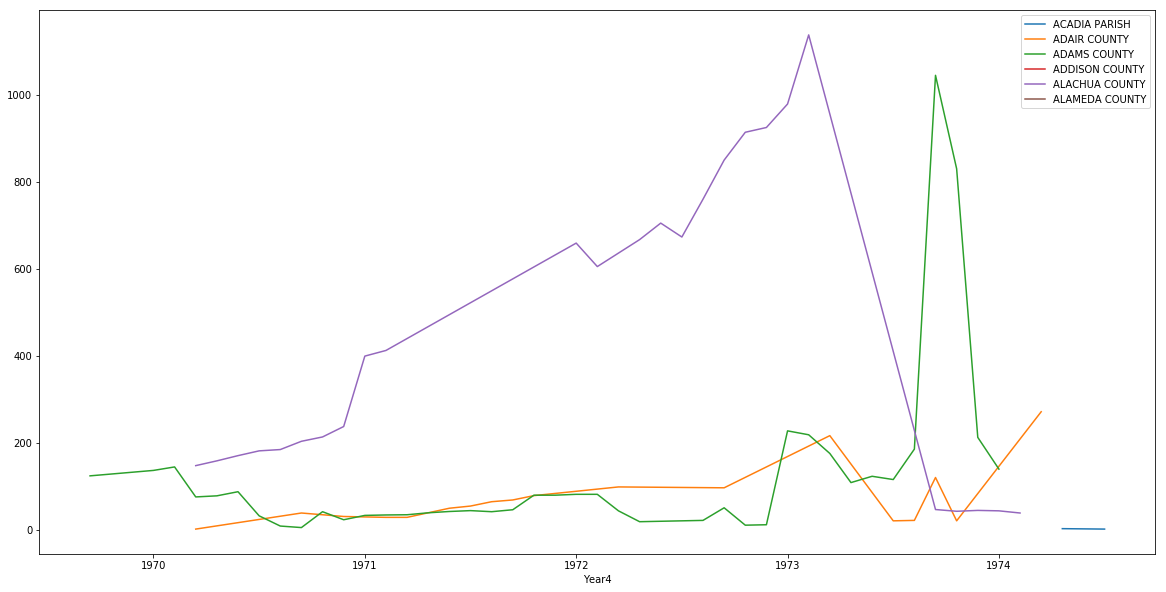

In [98]:
df_grouped = instances[['ID','Name','Total_Revenue','Year4','Motor_Vehicle_License_Total']].groupby('Name')
fig, ax = pyplot.subplots(figsize=(20,10))
years=[1967, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
ax.set_xticklabels(years, rotation=0)
count=0
for key, group in df_grouped:
#     if key == 381035035:
    group.groupby('Year4')['Motor_Vehicle_License_Total'].mean().plot(ax=ax,legend=True,label=key)
    count +=1
    if count > 5:
        break


In [ ]:
for feature,stat in stats.items():
    if stat['nans'][0] > 0:
        print(feature, " : ", stats[feature])

In [208]:
to_drop

{'Educ_NEC_Assistance',
 'Educ_NEC_Cap_Outlay',
 'Educ_NEC_Construction',
 'Educ_NEC_IG_To_State',
 'Elem_Educ_IG_Sch_to_Sch',
 'Emp_Ret_Other_Earnings',
 'Emp_Sec_Adm_Cap_Outlay',
 'Emp_Sec_Adm_Construct',
 'Emp_Sec_Adm_Current_Exp',
 'Emp_Sec_Adm_Direct_Exp',
 'Enrollment',
 'FIPS_Place',
 'FYEndDate',
 'Fed_IGR_Emp_Sec_Adm',
 'FunctionCode',
 'Hunting___Fishing_License',
 'IDChanged',
 'LTD_Iss_NG_Elec_Util',
 'LTD_Iss_NG_Elem_Educ',
 'LTD_Iss_NG_Gas_Util',
 'LTD_Iss_NG_Other_Educ',
 'LTD_Iss_NG_Trans_Util',
 'LTD_Ret_NG_Elec_Util',
 'LTD_Ret_NG_Elem_Educ',
 'LTD_Ret_NG_Gas_Util',
 'Local_IGR_InterSchool_Aid',
 'Net_Lottery_Revenue',
 'SchLevCode',
 'Total_Educ_Assist___Sub',
 'Total_Unemp_Rev',
 'Unemp_Comp_Bal_In_US_Trs',
 'Unemp_Comp_Ben_Paymts',
 'Unemp_Comp_Cash___Sec',
 'Unemp_Comp_Other_Balance',
 'Unemp_Comp_Total_Exp',
 'Unemp_Ext___Spec_Pmts',
 'Unemp_Federal_Advances',
 'Unemp_Int_Revenue',
 'Unemp_Payroll_Tax',
 'VetBonus',
 'Water_Trans_IG_To_Sta',
 'Welf_Cash_IG_Local_

In [ ]:
final_ignore_list = ['YearofData','YearPop','SchLevCode']

In [209]:
stats['Total_Revenue']

{'total_missing': (23, 0.00022083321331528262),
 'nans': (0, 0.0),
 'zeros': (23, 0.0002),
 'negatives': (8, 0.0001)}